In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

# ***Load dataset and perform basic exploratory data analysis***

In [ ]:
# load dataset
if os.path.exists('../data/student_exam_scores.csv'):
    df = pd.read_csv('../data/student_exam_scores.csv')
else:
    raise FileNotFoundError('File not found! Please check file path and try again!')

In [ ]:
# overview of the dataset
print('*****DATASET OVERVIEW*****\n')
print('Shape of dataset : ',df.shape,'\n') # shape of the dataset 
print('Columns in the dataset : ',df.columns.tolist(),'\n') # list of the columns in the dataset

print('First 5 rows \n',df.head(),'\n') 
print('Last 5 rows \n',df.tail())

*****DATASET OVERVIEW*****

Shape of dataset :  (200, 6) 

Columns in the dataset :  ['student_id', 'hours_studied', 'sleep_hours', 'attendance_percent', 'previous_scores', 'exam_score'] 

First 5 rows 
   student_id  hours_studied  sleep_hours  attendance_percent  previous_scores  \
0       S001            8.0          8.8                72.1               45   
1       S002            1.3          8.6                60.7               55   
2       S003            4.0          8.2                73.7               86   
3       S004            3.5          4.8                95.1               66   
4       S005            9.1          6.4                89.8               71   

   exam_score  
0        30.2  
1        25.0  
2        35.8  
3        34.0  
4        40.3   

Last 5 rows 
     student_id  hours_studied  sleep_hours  attendance_percent  \
195       S196           10.5          5.4                94.0   
196       S197            7.1          6.1                85.1   

# ***Comprehensive exploratory data analysis***

In [17]:
print('='*50)
print('DATA EXPLORATION AND QUALITY ASSESSMENT')
print('='* 50)

# a summary statistics of the columns in the dataset
print('\nDESCRIPTVE ANALYSIS OF DATA')
print(df.describe(include='all').T.round(2))

# handling null and missing values
print('\nMISSING VALUES ANALYSIS')
missing = df.isnull().sum()
missing_pct = (missing / len(df)) / 100
missing_values = pd.DataFrame({
    'missing count' : missing,
    'missing percentage' : missing_pct.round(2)
})
print(missing_values[missing_values['missing count'] > 0])

# outlier detection using IQR
print('\nOUTLIER DETECTION')
def detect_outliers(dataframe,column):
    q1 = dataframe[column].quantile(0.25)
    q3 = dataframe[column].quantile(0.75)
    iqr = q3 - q1 # interquartile range
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q3 + 1.5 * iqr
    outliers = dataframe[(dataframe[column] < lower_fence) | (dataframe[column] > upper_fence)]
    return outliers, upper_fence, lower_fence

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_columns: # ignore the student_id column
    outliers, upper, lower = detect_outliers(df,col)
    print(f'- {col} : {len(outliers)} outliers (Range: {lower:.2f} - {upper:.2f}) ')


# data distribution analyis
print('\nDISTRIBUTION ANALYSIS')
from scipy.stats import normaltest
for col in numeric_columns:
    stat, p_value = normaltest(df[col])
    is_normal = 'Normal' if p_value > 0.05 else 'Not Normal'
    print(f"-{col}: D'Agostino test p-value = {p_value:.4f} ({is_normal})")

DATA EXPLORATION AND QUALITY ASSESSMENT

DESCRIPTVE ANALYSIS OF DATA
                    count unique   top freq    mean        std   min   25%  \
student_id            200    200  S001    1     NaN        NaN   NaN   NaN   
hours_studied       200.0    NaN   NaN  NaN  6.3255   3.227317   1.0   3.5   
sleep_hours         200.0    NaN   NaN  NaN   6.622   1.497138   4.0   5.3   
attendance_percent  200.0    NaN   NaN  NaN   74.83  14.249905  50.3  62.2   
previous_scores     200.0    NaN   NaN  NaN    66.8  15.663869  40.0  54.0   
exam_score          200.0    NaN   NaN  NaN  33.955   6.789548  17.1  29.5   

                      50%     75%    max  
student_id            NaN     NaN    NaN  
hours_studied        6.15     9.0   12.0  
sleep_hours           6.7   8.025    9.0  
attendance_percent  75.25  87.425  100.0  
previous_scores      67.5    80.0   95.0  
exam_score          34.05   38.75   51.3  

MISSING VALUES ANALYSIS
Empty DataFrame
Columns: [missing count, missing percentag

# ***Creating advanced visualizations***

ADVANCED VISUALIZATIONS


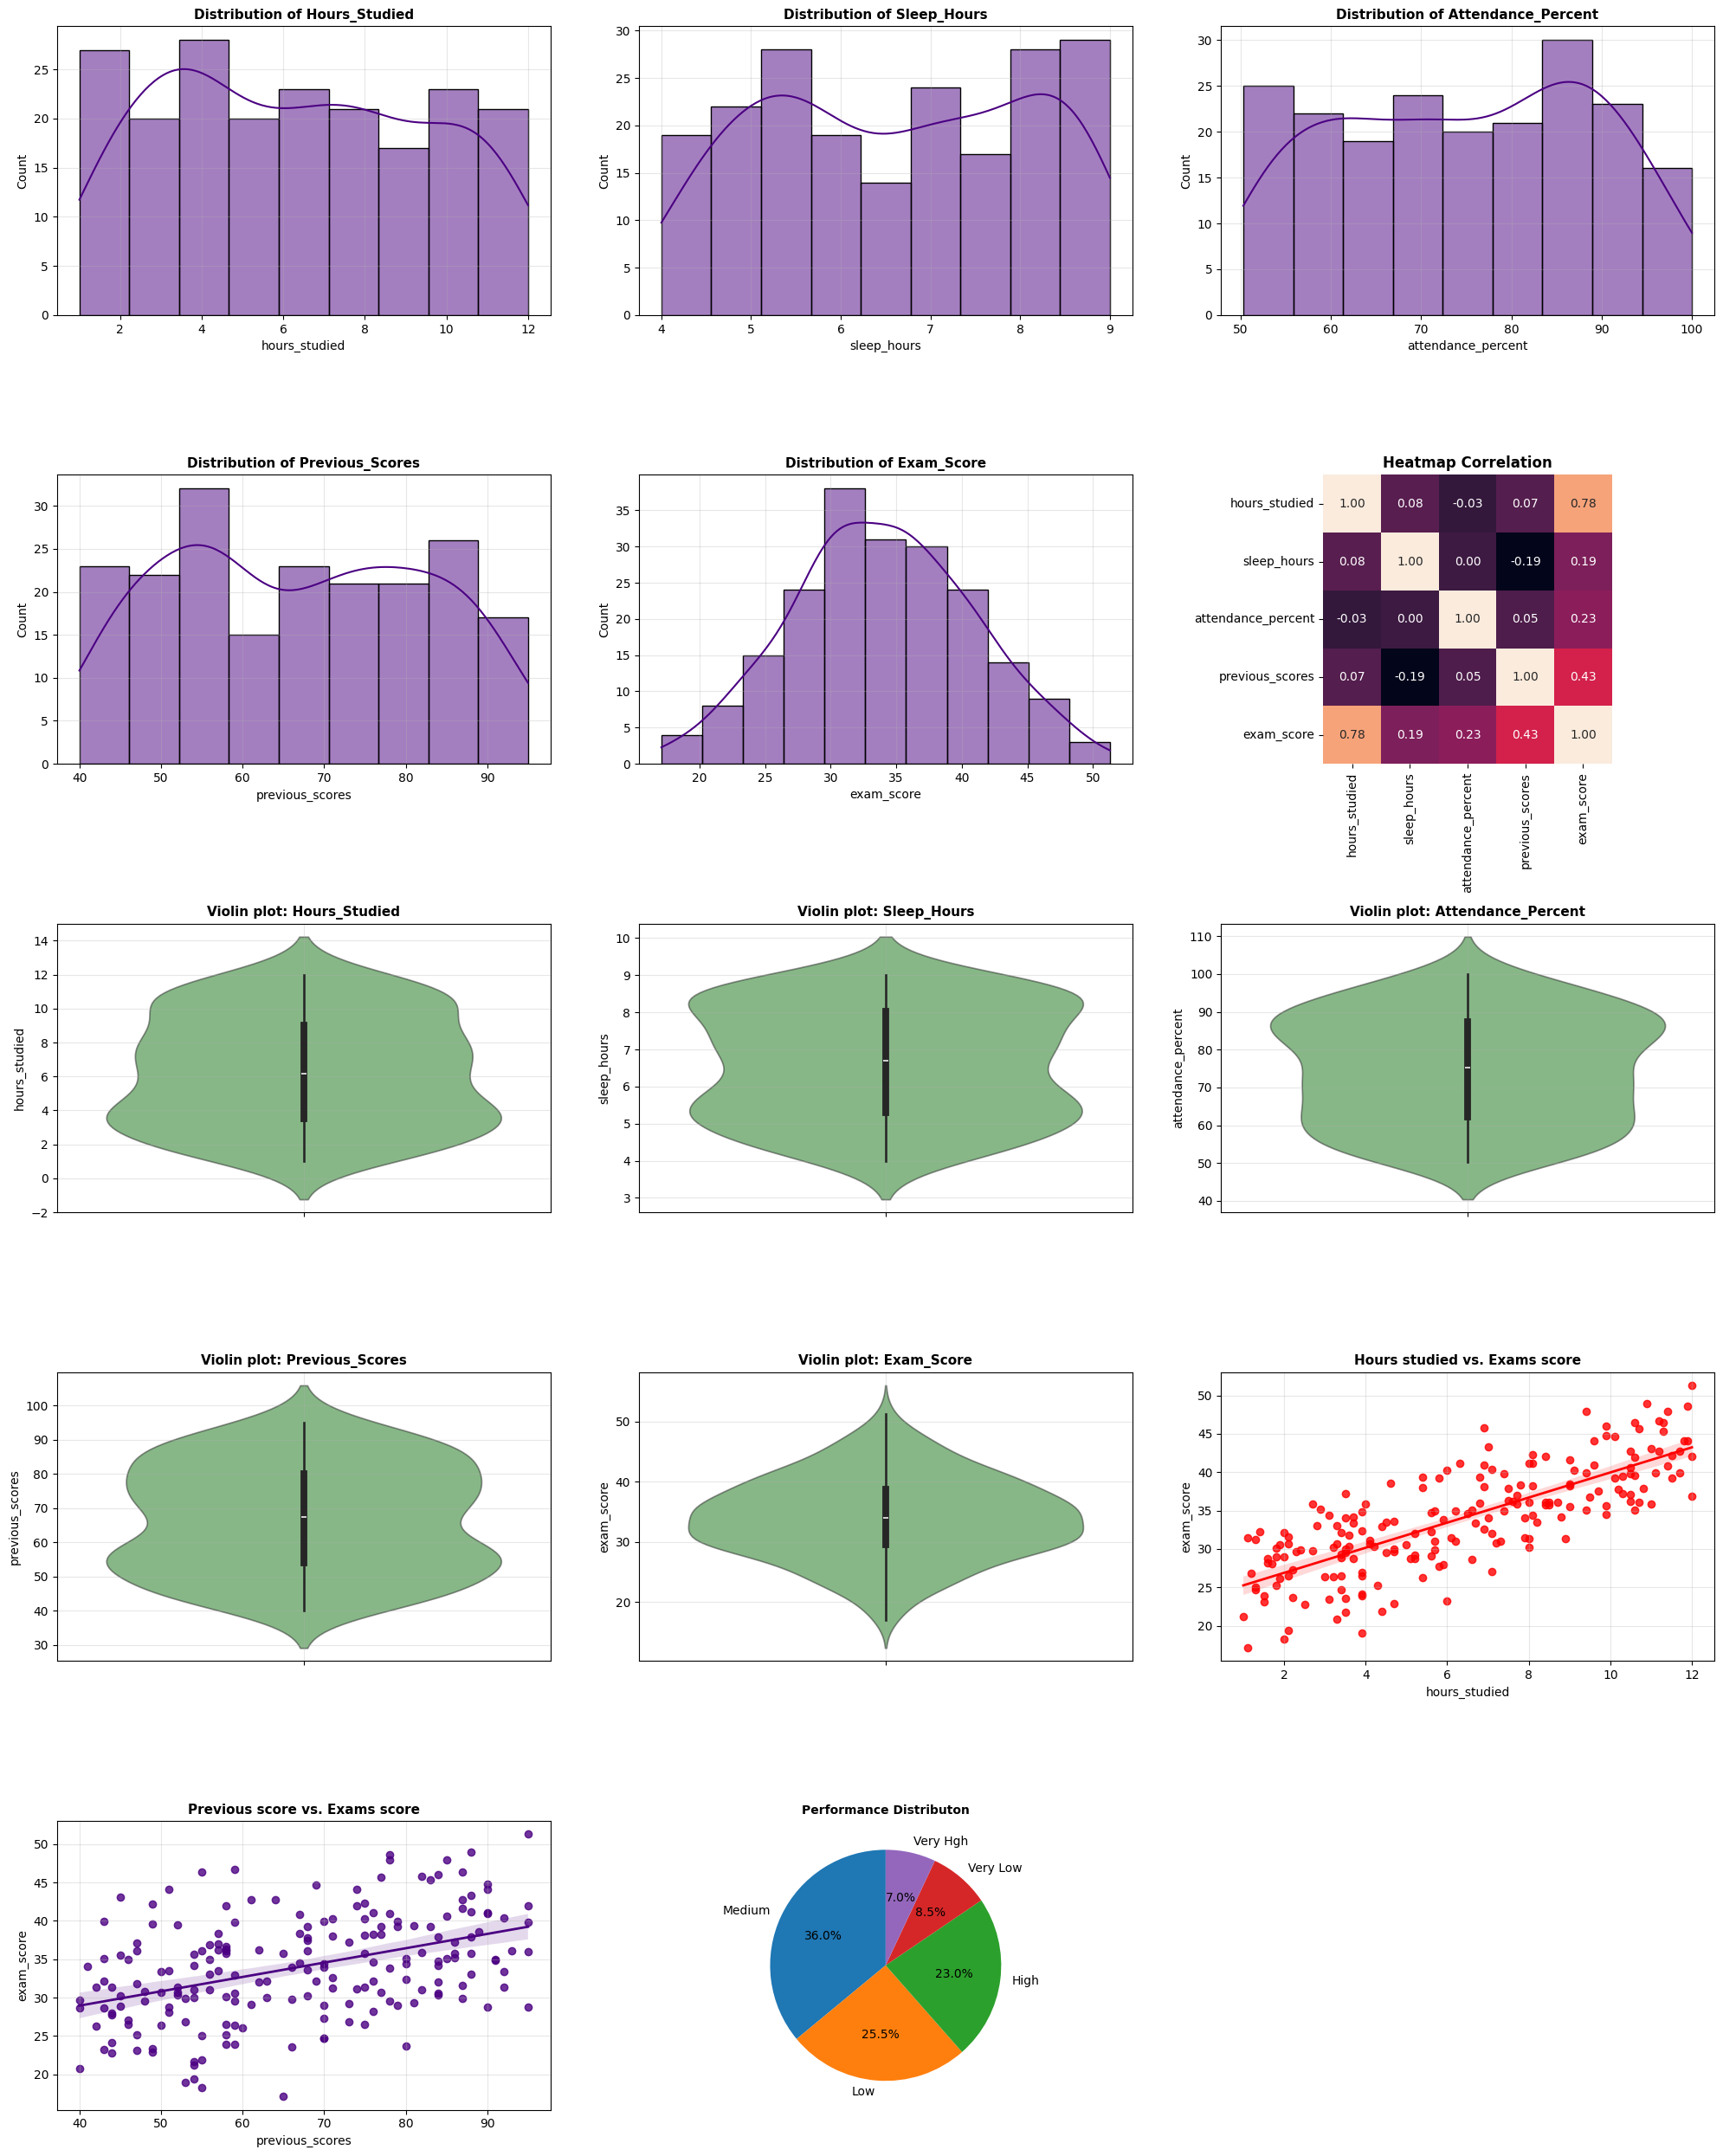

In [64]:
print('='*60)
print('ADVANCED VISUALIZATIONS')
print('='*60)

# create a comprehensive dashboard
fig = plt.figure(figsize=(20,25))

# distribution plots
for i,col in enumerate(numeric_columns):
    plt.subplot(5,3,i+1)
    sns.histplot(data=df,x=col,kde=True,alpha=0.5,color='indigo')
    plt.title(f'Distribution of {col.title()}',fontsize=11,fontweight='bold')
    plt.grid(True,alpha=0.3)

# correlation heatmap
plt.subplot(5,3,6)
corr = df[numeric_columns].corr()
sns.heatmap(data=corr,fmt='.2f',annot=True,cbar=False,square=True)
plt.title('Heatmap Correlation',fontsize=12, fontweight='bold')


# violin plots for outlier visualisation
for i,col in enumerate(numeric_columns):
    plt.subplot(5, 3, 7+i)
    sns.violinplot(data=df,y=col,color='green',alpha=0.5)
    plt.title(f'Violin plot: {col.title()}',fontsize=11, fontweight='bold')
    plt.grid(True,alpha=0.3)

# scatter plots with regression lines
plt.subplot(5, 3, 12)
sns.regplot(data=df,x='hours_studied',y='exam_score',color='red',line_kws={'linewidth' : 2,})
plt.title('Hours studied vs. Exams score',fontsize=11,fontweight='bold')
plt.grid(True,alpha=0.3)

plt.subplot(5, 3, 13)
sns.regplot(data=df,x='previous_scores',y='exam_score',color='indigo',line_kws={'linewidth' : 2,})
plt.title('Previous score vs. Exams score',fontsize=11,fontweight='bold')
plt.grid(True,alpha=0.3)

# performance distribution
plt.subplot(5, 3, 14)
performance_bins = pd.cut(df['exam_score'],bins=5,labels=['Very Low','Low','Medium','High','Very Hgh'])
performance_counts = performance_bins.value_counts()
plt.pie(performance_counts.values,autopct='%1.1f%%',labels=performance_counts.index,startangle=90)
plt.title('Performance Distributon', fontsize=10,fontweight='bold')

plt.tight_layout()
plt.show()